In [30]:
# load libraries/ dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [31]:
# load dataset
dataset = pd.read_csv("Arrests.csv")
dataset.head()


,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
0,1,Yes,White,2002,21,Male,Yes,Yes,3
1,2,No,Black,1999,17,Male,Yes,Yes,3
2,3,Yes,White,2000,24,Male,Yes,Yes,3
3,4,No,Black,2000,46,Male,Yes,Yes,1
4,5,Yes,Black,1999,27,Female,Yes,Yes,1


In [32]:
# remove first unwanted column
dataset.drop(dataset.columns[0], axis = 1, inplace = True)
dataset.head()


,released,colour,year,age,sex,employed,citizen,checks
0,Yes,White,2002,21,Male,Yes,Yes,3
1,No,Black,1999,17,Male,Yes,Yes,3
2,Yes,White,2000,24,Male,Yes,Yes,3
3,No,Black,2000,46,Male,Yes,Yes,1
4,Yes,Black,1999,27,Female,Yes,Yes,1


In [33]:
# change data type of feature
dataset['year'] = pd.to_datetime(dataset['year'], format='%Y').dt.year
dataset.head()

,released,colour,year,age,sex,employed,citizen,checks
0,Yes,White,2002,21,Male,Yes,Yes,3
1,No,Black,1999,17,Male,Yes,Yes,3
2,Yes,White,2000,24,Male,Yes,Yes,3
3,No,Black,2000,46,Male,Yes,Yes,1
4,Yes,Black,1999,27,Female,Yes,Yes,1


In [34]:
# check empty entries
print("number of empty records in each features : ")
dataset.isna().sum()


number of empty records in each features : 


released    0
colour      0
year        0
age         0
sex         0
employed    0
citizen     0
checks      0
dtype: int64

In [35]:
# check duplicate entries and capturing it
duplicated_entries_df = dataset[dataset.duplicated()]
print(f"number of duplicate entries : {dataset.duplicated().sum()}")

# we are going to keep duplicate entries in further analysis because they can provide
# additional insights.

number of duplicate entries : 2347


In [36]:
# number of records
print(f"number of records in dataset : {len(dataset)}")

number of records in dataset : 5226


In [37]:
# general information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5226 entries, 0 to 5225
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   released  5226 non-null   object
 1   colour    5226 non-null   object
 2   year      5226 non-null   int64 
 3   age       5226 non-null   int64 
 4   sex       5226 non-null   object
 5   employed  5226 non-null   object
 6   citizen   5226 non-null   object
 7   checks    5226 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 326.8+ KB


In [38]:
# statistical information of dataset
dataset.describe()


,year,age,checks
count,5226.000000,5226.000000,5226.000000
mean,1999.509376,23.846537,1.636433
std,1.390056,8.316133,1.539230
min,1997.000000,12.000000,0.000000
25%,1998.000000,18.000000,0.000000
50%,2000.000000,21.000000,1.000000
75%,2001.000000,27.000000,3.000000
max,2002.000000,66.000000,6.000000


#### single feature analysis

In [39]:
# value count of each categorical feature
cat_cols = dataset.select_dtypes(include=['object']).columns.tolist()
value_counts_df = pd.DataFrame(columns=['Column Name', 'Value', 'Count'])

for col in cat_cols:
    value_counts = dataset[col].value_counts().reset_index()
    value_counts.columns = ['Value', 'Count']
    value_counts['Column Name'] = col
    value_counts_df = pd.concat([value_counts_df, value_counts], ignore_index=True)

print(value_counts_df)


  Column Name   Value Count
0    released     Yes  4334
1    released      No   892
2      colour   White  3938
3      colour   Black  1288
4         sex    Male  4783
5         sex  Female   443
6    employed     Yes  4111
7    employed      No  1115
8     citizen     Yes  4455
9     citizen      No   771


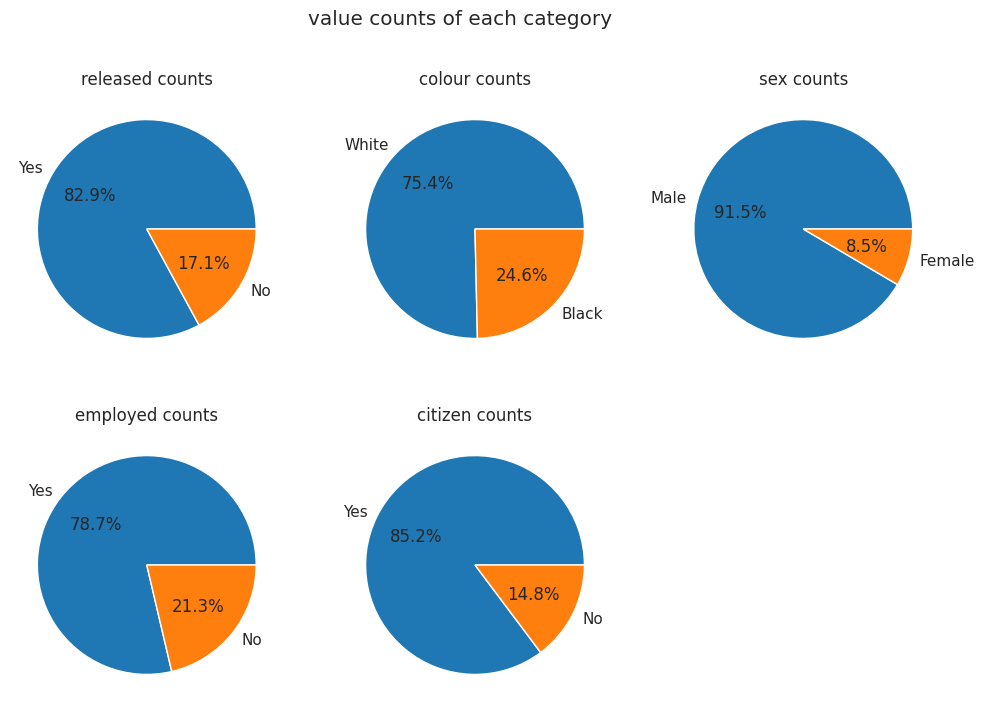

In [68]:
# pie chart to display percentage of each class of features
fig, ax = plt.subplots(2, 3, figsize = (12, 8))
ax[0][0].pie(dataset['released'].value_counts().values, labels=dataset['released'].value_counts().index, autopct='%1.1f%%')
ax[0][0].set_title('released counts')
ax[0][1].pie(dataset['colour'].value_counts().values, labels=dataset['colour'].value_counts().index, autopct='%1.1f%%')
ax[0][1].set_title('colour counts')
ax[0][2].pie(dataset['sex'].value_counts().values, labels=dataset['sex'].value_counts().index, autopct='%1.1f%%')
ax[0][2].set_title('sex counts')
ax[1][0].pie(dataset['employed'].value_counts().values, labels=dataset['employed'].value_counts().index, autopct='%1.1f%%')
ax[1][0].set_title('employed counts')
ax[1][1].pie(dataset['citizen'].value_counts().values, labels=dataset['citizen'].value_counts().index, autopct='%1.1f%%')
ax[1][1].set_title('citizen counts')
ax[1][2].axis('off')
plt.suptitle('value counts of each category')
plt.show()


In [72]:
# quartiles of year
quartiles = dataset['year'].describe()[['min', '25%', '50%', '75%', 'max']]
print(quartiles)

min    1997.0
25%    1998.0
50%    2000.0
75%    2001.0
max    2002.0
Name: year, dtype: float64


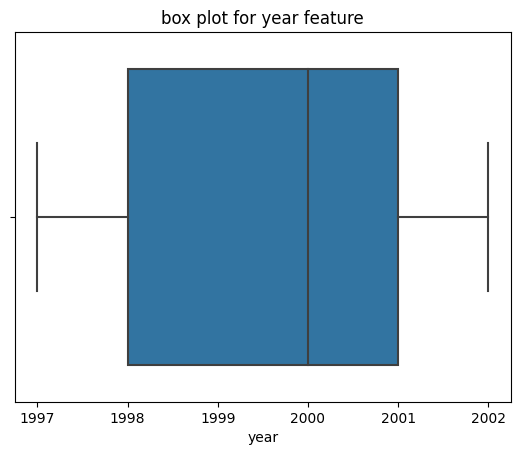

In [41]:
# box plot for year feature
sns.boxplot(data = dataset, x = 'year')
plt.title('box plot for year feature')
plt.show()
plt.close()

# smallest year - 1997
# 25% of years is below 1998
# 50% of years are below year 2000 and above year 2000 
# 75% of years are below year 2001
# maximum value of year - 2002

# the line in box plot is median representing middle value of year

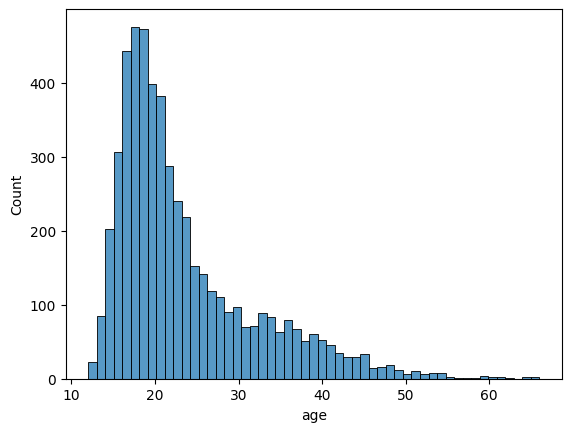

In [42]:
# histogram of age
sns.histplot(data = dataset, x = 'age')
plt.show()
plt.close()

# histogram represent the frequency distribution of age data points
# frequency distribution of age 15-25 is high


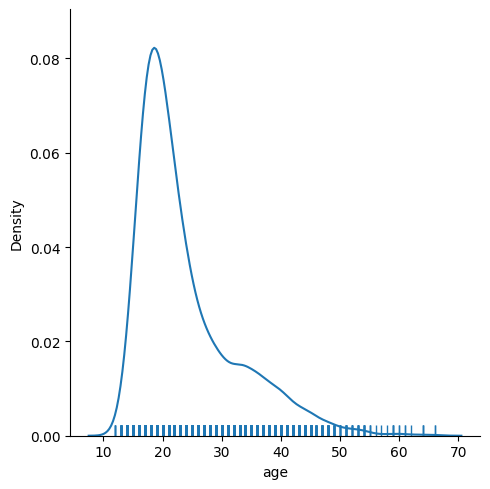

In [45]:
# displot and rugplot for age
sns.displot(data = dataset, x = 'age', kind = 'kde')
sns.rugplot(
  data = dataset,
  x = 'age',
) 
plt.show()
plt.close()

# displot witd kde - shows the distribution of data with kernel density estimation
# rugplot - shows the distribution of data points along the x-axis
# frequency distribution of age 15-25 is high

In [70]:
# quartiles for age
quartiles = dataset['age'].describe()[['min', '25%', '50%', '75%', 'max']]
print(quartiles)

# youngest individual in data is 12 years old
# 25% of the individuals in the dataset are younger than or equal to 18 years old
# 50% of the individuals in the dataset are younger than or equal to 21 years old
# 75% of the individuals in the dataset are younger than or equal to 27 years old
# oldest individual in the dataset is 66 years old


min    12.0
25%    18.0
50%    21.0
75%    27.0
max    66.0
Name: age, dtype: float64


In [73]:
# outliers according to quartiles
# calculate the interquartile range (IQR)
q1 = dataset['age'].quantile(0.25)
q3 = dataset['age'].quantile(0.75)
iqr = q3 - q1

# calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# find the outliers
outliers = dataset[(dataset['age'] < lower_bound) | (dataset['age'] > upper_bound)]
print("Outliers:\n", outliers)

Outliers:
      released colour  year  age   sex employed citizen  checks
3          No  Black  2000   46  Male      Yes     Yes       1
13        Yes  Black  1997   42  Male      Yes     Yes       0
16         No  White  2001   45  Male       No     Yes       4
24        Yes  White  2000   49  Male      Yes     Yes       0
56        Yes  White  2001   42  Male      Yes     Yes       3
...       ...    ...   ...  ...   ...      ...     ...     ...
5186      Yes  White  2000   47  Male      Yes     Yes       0
5202      Yes  White  2002   45  Male       No     Yes       3
5206      Yes  White  2002   46  Male      Yes     Yes       1
5209      Yes  White  2001   42  Male       No     Yes       3
5215       No  Black  1999   42  Male      Yes     Yes       5

[293 rows x 8 columns]


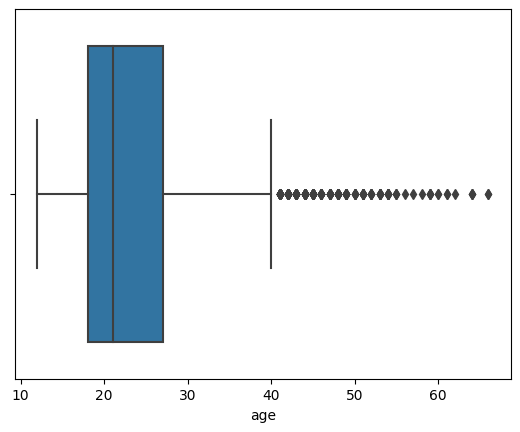

In [44]:
# boxplot for age feature
# graphically depicting groups of feature through their quartiles
sns.boxplot(data = dataset, x = 'age')
plt.show()
plt.close()


In [74]:
# quartiles for checks
quartiles = dataset['checks'].describe()[['min', '25%', '50%', '75%', 'max']]
print(quartiles)

# 0 means that there are some individuals in the dataset who have no data available in the police databases.
# 25% of the individuals in the dataset have no data available in the police databases. This could indicate that there are many individuals in the dataset who have not had any interaction with law enforcement or have not been involved in any criminal activity.
# 50% of the individuals in the dataset have data available in one or more police databases. This suggests that the majority of individuals in the dataset have some level of interaction with law enforcement or have been involved in some form of criminal activity.
# 75% of the individuals in the dataset have data available in three or fewer police databases. This reinforces the idea that the majority of individuals in the dataset have a relatively low level of interaction with law enforcement or have only been involved in minor criminal activity.
# 6 meanss that there are some individuals in the dataset who have data available in all six of the police databases. 


min    0.0
25%    0.0
50%    1.0
75%    3.0
max    6.0
Name: checks, dtype: float64


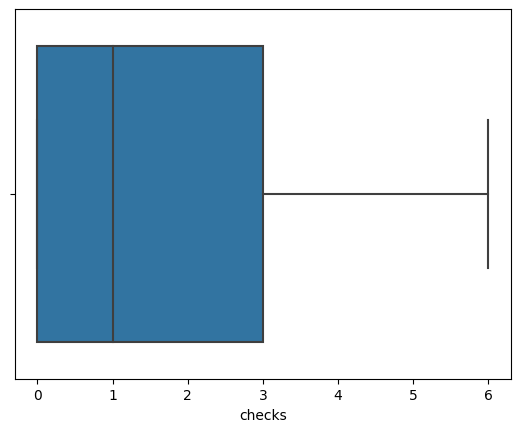

In [46]:
# boxplot for feature - checks 
# graphically depicting groups of feature through their quartiles
sns.boxplot(data = dataset, x = 'checks')
plt.show()
plt.close()


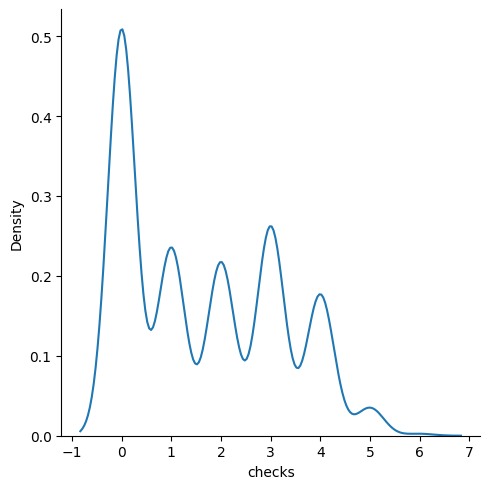

In [47]:
# displot for checks
sns.displot(data = dataset, x = 'checks', kind = 'kde')
plt.show()
plt.close()

# displot witd kde - shows the distribution of data with kernel density estimation

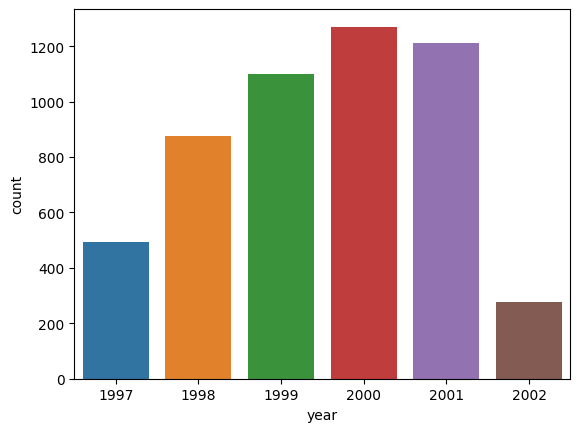

In [48]:
# countplot for feature - year
sns.countplot(data = dataset, x = 'year')
plt.show()
plt.close()

# countplot showing number of counts of each year


#### multi-feature analysis

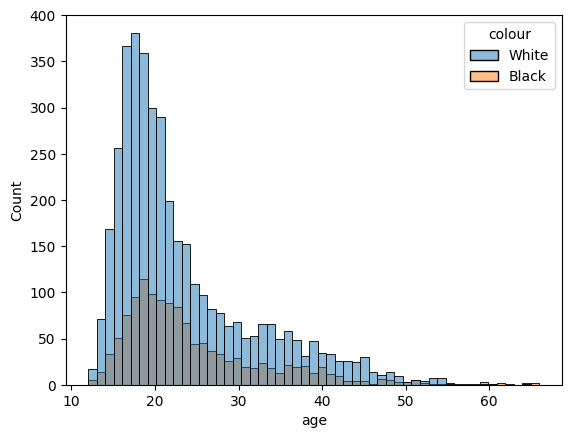

In [43]:
# histogram of age with colour
sns.histplot(data = dataset, x = 'age', hue = 'colour')
plt.show()
plt.close()


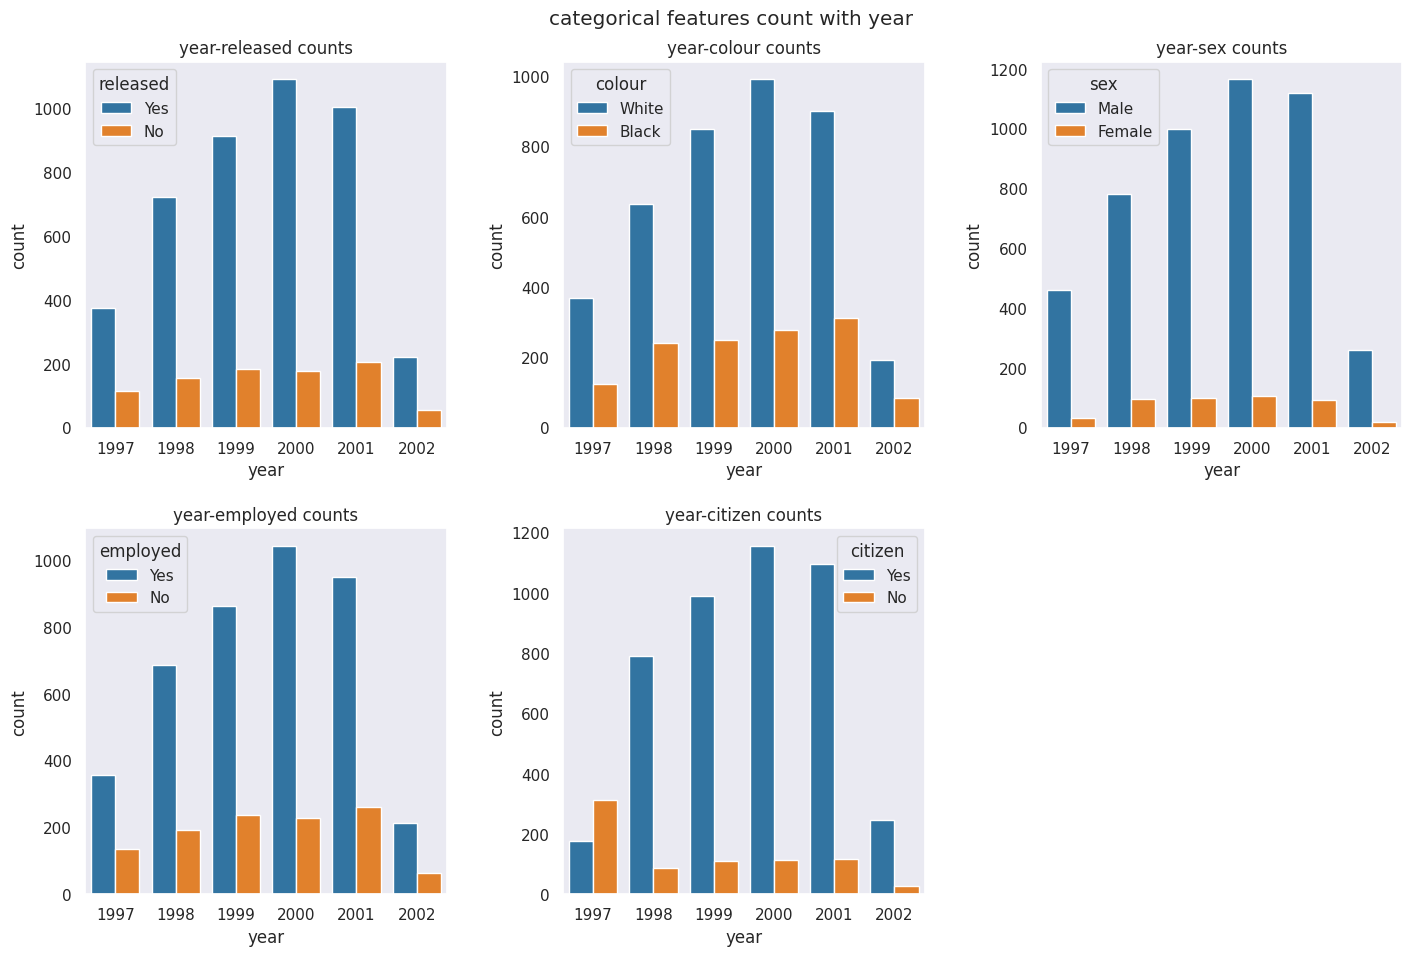

In [90]:
# count plot of cateegorical features with year
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.tight_layout(pad = 4.0)
sns.countplot(data = dataset, x = 'year', hue = 'released', ax = axes[0][0])
sns.countplot(data = dataset, x = 'year', hue = 'colour', ax = axes[0][1])
sns.countplot(data = dataset, x = 'year', hue = 'sex', ax = axes[0][2])
sns.countplot(data = dataset, x = 'year', hue = 'employed', ax = axes[1][0])
sns.countplot(data = dataset, x = 'year', hue = 'citizen', ax = axes[1][1])
axes[0][0].set_title("year-released counts")
axes[0][1].set_title("year-colour counts")
axes[0][2].set_title("year-sex counts")
axes[1][0].set_title("year-employed counts")
axes[1][1].set_title("year-citizen counts")
axes[1][2].axis('off')
plt.suptitle('categorical features count with year')

plt.show()
plt.close()

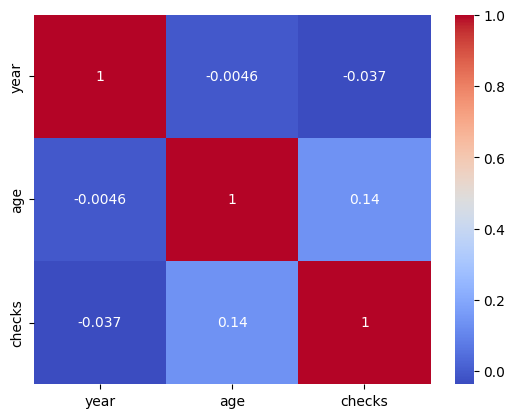

In [54]:
# heatmap for age and checks
sns.heatmap(dataset.corr(), cmap = 'coolwarm', annot = True)
plt.show()
plt.close()

# here heatmap represents correlation matrix of set of features
# 0.14 in particular cell indicate a moderate positive correlation between two variable age and checks


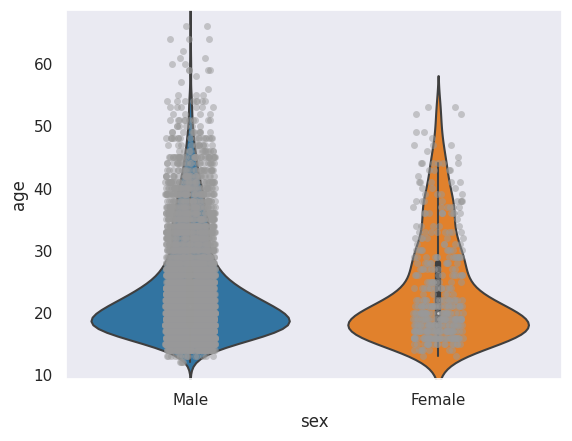

In [100]:
# violin and strip plot for age with sex
sns.violinplot(data = dataset, x = 'sex', y = 'age')
sns.stripplot(data = dataset, x = 'sex', y = 'age', color = '.6', alpha=0.5)
plt.show()
plt.close()

# violin plot - shows distribution of data and the width of violin plot represents the density of the data at the point
# strip plot - scatter plot to display distribution of data.


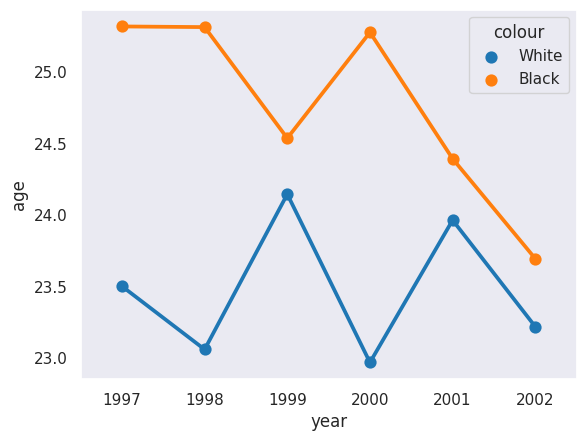

In [109]:
# point plot for age with colour and year
sns.pointplot(data = dataset, x = 'year', y = 'age', hue = 'colour', ci = None)
plt.show()
plt.close()

# point plot shows mean of a quantitative feature. 
# plot displaying years with average age of white and black colour which are featured in dataset


<AxesSubplot: xlabel='year', ylabel='checks'>

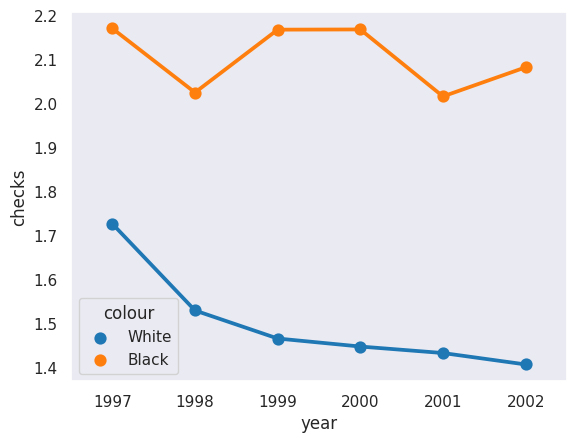

In [104]:
# point plot for checks with colour and year
sns.pointplot(data = dataset, x = 'year', y = 'checks', hue = 'colour', ci = None)

# point plot shows mean of a quantitative feature. 
# plot displaying years with average checks of white and black colour which are featured in dataset
# there is gap between classes of colour

<AxesSubplot: xlabel='year', ylabel='checks'>

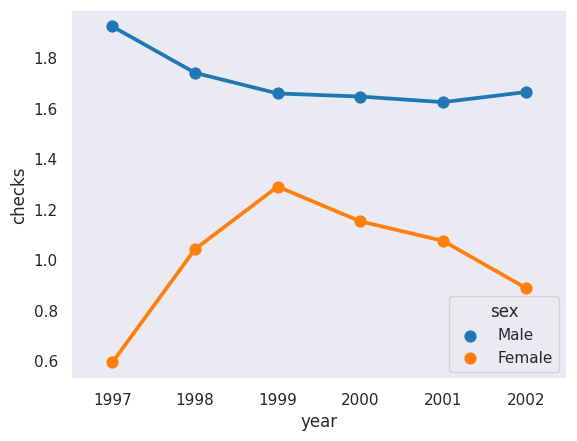

In [107]:
# point plot for checks with sex and year
sns.pointplot(data = dataset, x = 'year', y = 'checks', hue = 'sex', ci = None)

# point plot shows mean of a quantitative feature. 
# plot displaying years with average checks of male/female which are featured in dataset
# there is gap between classes of sex


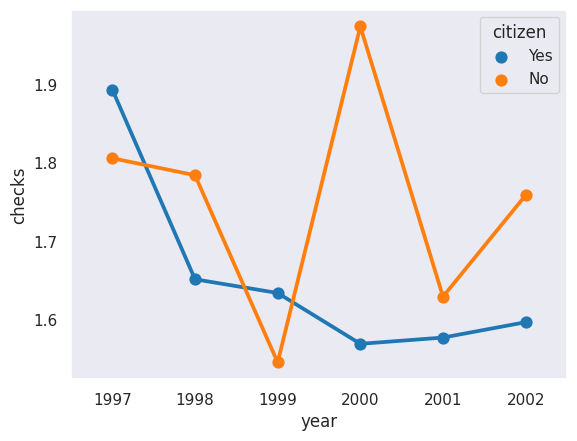

In [110]:
# point plot for checks with citizen and year
sns.pointplot(data = dataset, x = 'year', y = 'checks', hue = 'citizen', ci = None)
plt.show()
plt.close()

# point plot shows mean of a quantitative feature. 
# plot displaying years with average checks of citizen which are featured in dataset
# average checks fornon-citizen is generally high


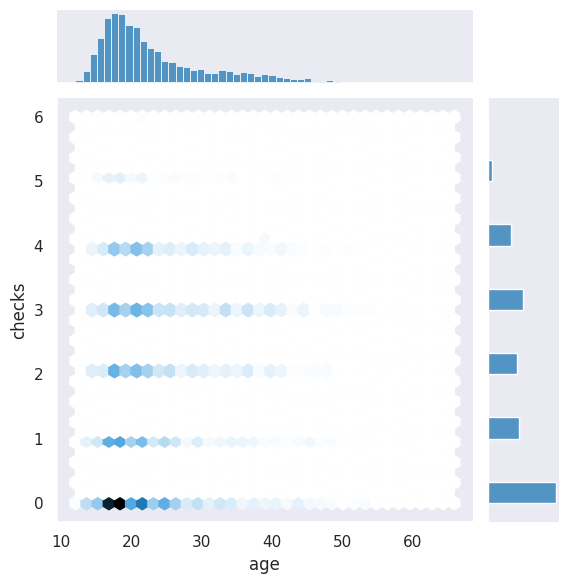

In [113]:
# joint plot
sns.jointplot(data = dataset, x = 'age', y ='checks', kind = 'hex')
plt.show()
plt.close()

# joint plot allows us to visualize joint distribution of two features along with individual distribution of each feature
# we can say the fequency of check for age 15 to 25 age is high

In [ ]:
# end

In [ ]:
# thank you!